In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv(r"train.txt", sep=";", names=["content", "sentiment"], encoding="utf-8")
dataset.head(3)

,content,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger


***type of emotion for detection***

In [3]:
dataset["sentiment"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [4]:
dataset.shape

(16000, 2)

**null row**

In [5]:
dataset.isnull().sum()

content      0
sentiment    0
dtype: int64

**duplicate row**

In [6]:
dataset.duplicated().sum()

1

In [7]:
# drop duplicate row

dataset.drop_duplicates(inplace=True)

**content length of each sentiment**

In [8]:
dataset['sentiment'].value_counts()

sentiment
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

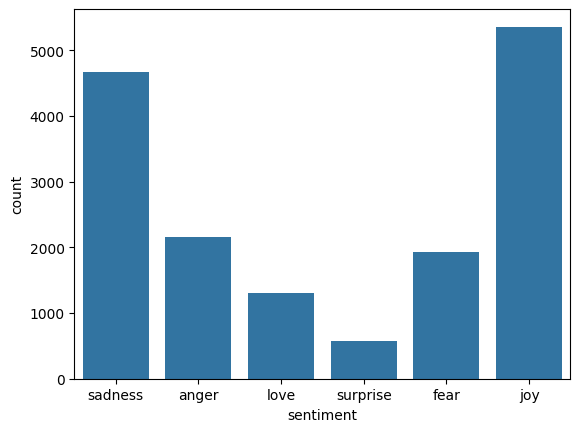

In [9]:

# plt.figure(figsize=(14, 8))
sns.countplot(x = dataset['sentiment'])
plt.show()

***Word count images***

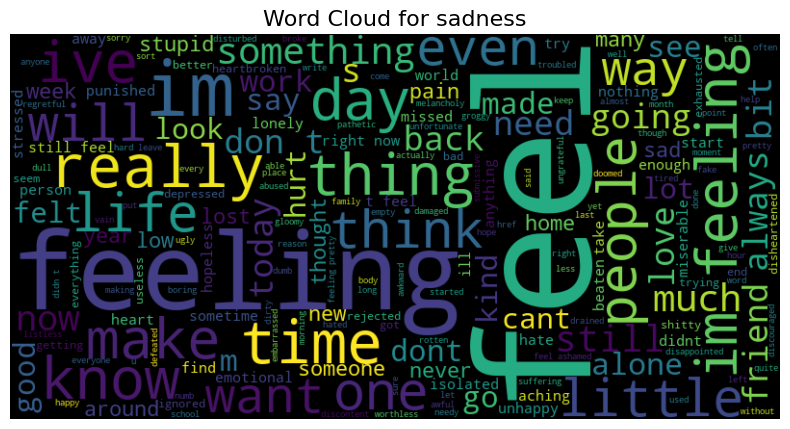

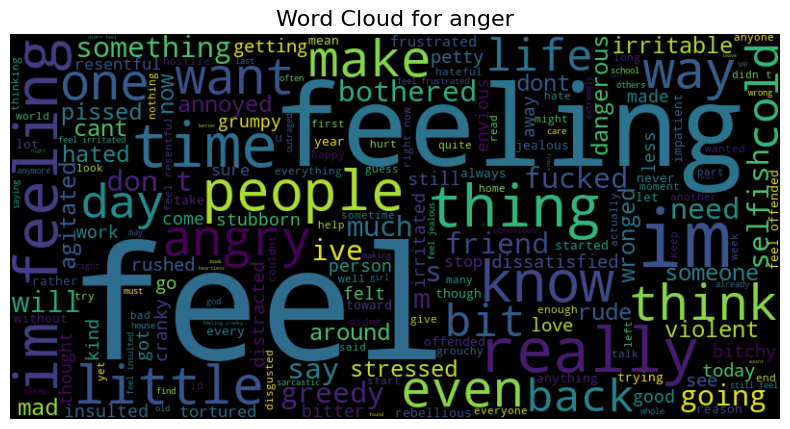

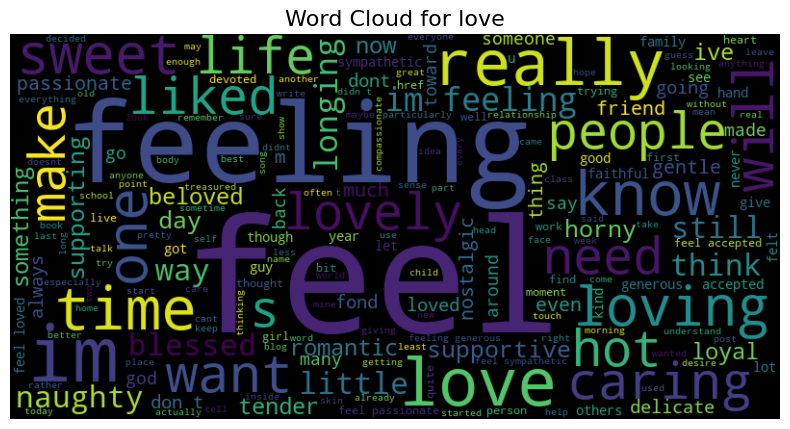

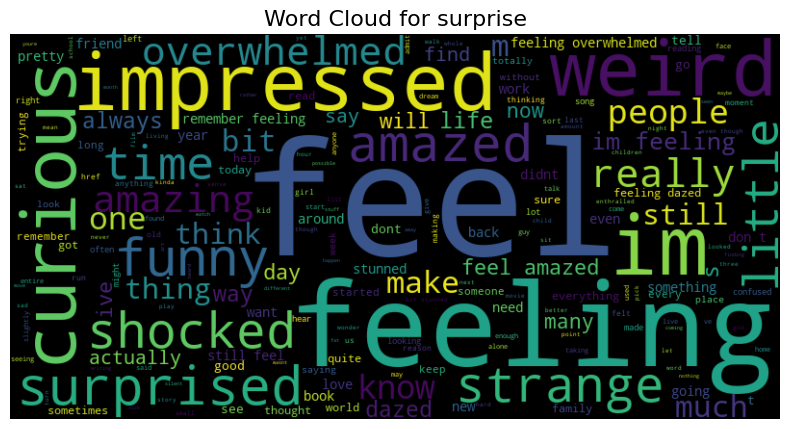

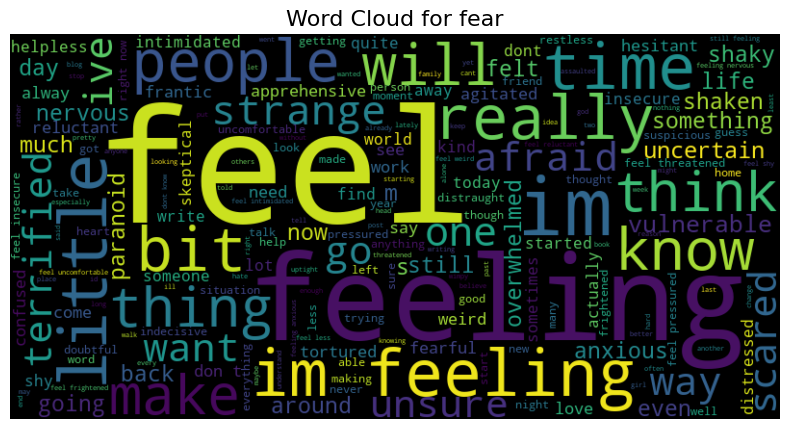

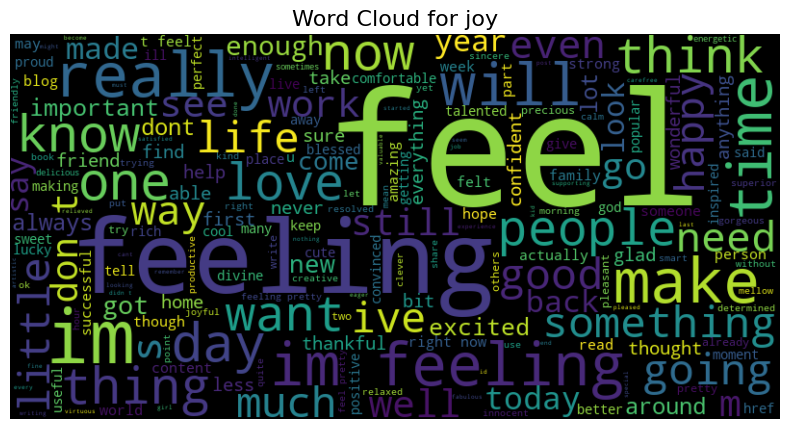

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate and display the word cloud for each sentiment
def generate_wordclouds(dataset):
    emotions_list = dataset['sentiment'].unique()  
    
    for sentiment in emotions_list:
        text = ' '.join(dataset.loc[dataset['sentiment'] == sentiment, 'content'])  

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

        
        plt.figure(figsize=(10, 5))
        plt.title(f"Word Cloud for {sentiment}", fontsize=16)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

generate_wordclouds(dataset)


**encoding the sentiment**

In [11]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
dataset['sentiment'] = lb.fit_transform(dataset['sentiment'])

dataset.head(3)

,content,sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0


In [12]:
dataset['sentiment'].unique()

array([4, 0, 3, 5, 1, 2])

# Data preprocessing

***NLP***

In [13]:
from nltk.tokenize.treebank import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [15]:
# download the packages in nltk library

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords

stop_word_english = stopwords.words('english')

from string import punctuation

extra_word = ["``", "''" ]   # extra words to remove from the text which is not in list of stopwords

stop_word = list(punctuation) + stop_word_english + extra_word



In [17]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# and stemmer.stem(word)

In [18]:
def preprocess_text(text):
         
    tokens = tokenizer.tokenize(text.lower())
    
    # remove stopword and apply lemmatize for root word
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_word and word.isalpha()]
    
    return ' '.join(cleaned_tokens)


dataset['cleaned_text'] = dataset['content'].apply(preprocess_text)

print(dataset[['content', 'cleaned_text', 'sentiment']].head())


                                             content  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                        cleaned_text  sentiment  
0                              didnt feel humiliated          4  
1  go feeling hopeless damned hopeful around some...          4  
2          im grabbing minute post feel greedy wrong          0  
3  ever feeling nostalgic fireplace know still pr...          3  
4                                    feeling grouchy          0  


In [19]:
dataset.head(3)

,content,sentiment,cleaned_text
0,i didnt feel humiliated,4,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,4,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,0,im grabbing minute post feel greedy wrong


**vectorize the cleaned_text**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = vectorizer.fit_transform(dataset['cleaned_text'])

**Scalling**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
x = scaler.fit_transform(x)


In [22]:
y = dataset["sentiment"]

**splitting dataset to train and test**

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)

# applying Machine Learning

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

***single model***

In [26]:
  
lr = LogisticRegression(solver='saga', max_iter=2000)
lr.fit(x_train, y_train)
    
print(f"train {lr.score(x_train, y_train)*100}")
print(f"test {lr.score(x_test, y_test)*100}") 

# Predict on the training data
train_predictions = lr.predict(x_train)
test_predictions = lr.predict(x_test)

# Get the classification report and accuracy score for the training set
train_classification_report = classification_report(y_train, train_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


# Print the metrics
print(f"LogisticRegression - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")
print(f"LogisticRegression - Training Classification Report:\n{train_classification_report}\n")
print(f"{'-' * 40}\n")


train 99.71426020180373
test 78.10416666666666
LogisticRegression - Training Accuracy: 1.00, Testing Accuracy: 0.78
LogisticRegression - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       0.99      0.99      0.99      1365
           2       1.00      1.00      1.00      3763
           3       1.00      0.99      0.99       919
           4       1.00      1.00      1.00      3234
           5       0.99      0.99      0.99       411

    accuracy                           1.00     11199
   macro avg       1.00      0.99      1.00     11199
weighted avg       1.00      1.00      1.00     11199


----------------------------------------



c:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


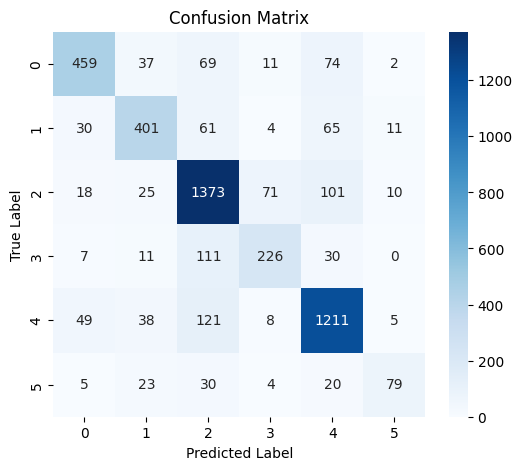

In [27]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**single model prediction**

In [28]:
def predict_emotion(input_text):
    cleaned_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = lr.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lr.predict(input_vectorized))

    return predicted_emotion,label

# Example usage 
sentences = [
            "i didn't feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "I love you"
]
            
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print(f"{'-' * 60}")



i didn't feel humiliated
Prediction : sadness
Label : 4
------------------------------------------------------------
i feel strong and good overall
Prediction : joy
Label : 2
------------------------------------------------------------
im grabbing a minute to post i feel greedy wrong
Prediction : anger
Label : 0
------------------------------------------------------------
He was speechles when he found out he was accepted to this new job
Prediction : joy
Label : 2
------------------------------------------------------------
This is outrageous, how can you talk like that?
Prediction : joy
Label : 2
------------------------------------------------------------
I feel like im all alone in this world
Prediction : sadness
Label : 4
------------------------------------------------------------
He is really sweet and caring
Prediction : love
Label : 3
------------------------------------------------------------
You made me very crazy
Prediction : joy
Label : 2
----------------------------------

# model with loop

***model list*** 

In [29]:
models = {
    'Linear': LogisticRegression(solver='saga', max_iter=1000) ,
    'MLP': MLPClassifier(max_iter=500), 
    'KNeighbors': KNeighborsClassifier(n_neighbors= 41),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=10),
    'svc': SVC(kernel="sigmoid")
}


lr = LogisticRegression() 
kn = KNeighborsClassifier(n_neighbors= 41)
sv = SVC(kernel="sigmoid")
rfc = RandomForestClassifier(n_estimators=10)
clf = DecisionTreeClassifier()
mlp = MLPClassifier()

***model loop for all model to run one by one***

In [30]:
# Loop through each model
for name, model in models.items():
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
      
    # Predict on the training data
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)

    # Get the classification report and accuracy score for the training set
    train_classification_report = classification_report(y_train, train_predictions)
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)



    # Print the metrics
    print(f"{name} - Training Accuracy: {train_accuracy:.5f}\n        Testing Accuracy: {test_accuracy:.5f}")
    print(f"{name} - Training Classification Report:\n{train_classification_report}\n")
    print(f"{'-' * 40}\n")



c:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Linear - Training Accuracy: 0.99652
        Testing Accuracy: 0.77958
Linear - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       0.99      0.99      0.99      1365
           2       1.00      1.00      1.00      3763
           3       1.00      0.99      0.99       919
           4       1.00      1.00      1.00      3234
           5       0.99      0.99      0.99       411

    accuracy                           1.00     11199
   macro avg       1.00      0.99      0.99     11199
weighted avg       1.00      1.00      1.00     11199


----------------------------------------

MLP - Training Accuracy: 0.99830
        Testing Accuracy: 0.74687
MLP - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       1.00      1.00      1.00      1365
           2       1.00      1.00  

c:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

KNeighbors - Training Accuracy: 0.45227
        Testing Accuracy: 0.42604
KNeighbors - Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.06      0.11      1507
           1       0.97      0.14      0.25      1365
           2       0.38      1.00      0.55      3763
           3       0.00      0.00      0.00       919
           4       0.93      0.32      0.47      3234
           5       0.00      0.00      0.00       411

    accuracy                           0.45     11199
   macro avg       0.53      0.25      0.23     11199
weighted avg       0.63      0.45      0.37     11199


----------------------------------------

DecisionTree - Training Accuracy: 0.99830
        Testing Accuracy: 0.86042
DecisionTree - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1507
           1       1.00      1.00      1.00      1365
         

***loop model prediction***

In [31]:
def predict_emotion(input_text, models):

    # Predict emotion for the given input text using multiple models.

    cleaned_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([cleaned_text])

    predictions = {}
    for model_name, model in models.items():
        predicted_label = model.predict(input_vectorized)[0]
        predicted_emotion = lb.inverse_transform([predicted_label])[0]
        label = np.max(model.predict(input_vectorized))  # Get the highest prediction probability

        predictions[model_name] = {
            "Emotion": predicted_emotion,
            "Label": label
        }

    return predictions

# Example usage 
sentences = [
            "i didn't feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "I love you"
]
            
for sentence in sentences:
    print(f"Sentence: {sentence}")
    predictions = predict_emotion(sentence, models)
    
    for model_name, result in predictions.items():
        print(f"{model_name} Prediction: {result['Emotion']}")
        print(f"{model_name} Label: {result['Label']}")
    
    print("-" * 60)



Sentence: i didn't feel humiliated
Linear Prediction: sadness
Linear Label: 4
MLP Prediction: sadness
MLP Label: 4
KNeighbors Prediction: joy
KNeighbors Label: 2
DecisionTree Prediction: anger
DecisionTree Label: 0
RandomForest Prediction: anger
RandomForest Label: 0
svc Prediction: joy
svc Label: 2
------------------------------------------------------------
Sentence: i feel strong and good overall
Linear Prediction: joy
Linear Label: 2
MLP Prediction: joy
MLP Label: 2
KNeighbors Prediction: joy
KNeighbors Label: 2
DecisionTree Prediction: anger
DecisionTree Label: 0
RandomForest Prediction: anger
RandomForest Label: 0
svc Prediction: joy
svc Label: 2
------------------------------------------------------------
Sentence: im grabbing a minute to post i feel greedy wrong
Linear Prediction: anger
Linear Label: 0
MLP Prediction: anger
MLP Label: 0
KNeighbors Prediction: joy
KNeighbors Label: 2
DecisionTree Prediction: anger
DecisionTree Label: 0
RandomForest Prediction: anger
RandomForest

In [32]:
print(dataset["sentiment"].unique())

encoded_values = [4, 0, 3, 5, 1, 2]  # The unique encoded values you want to decode

decoded_labels = lb.inverse_transform(encoded_values)
print(decoded_labels)

[4 0 3 5 1 2]
['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


# deep learning

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
# from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import re

In [25]:
df = dataset.copy()

**clean the text and divide it into train and test**

In [26]:
# Text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stop_word]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Assuming `dataset` is a DataFrame containing the text and labels
x_data = text_cleaning(dataset, "content", vocab_size=11000, max_len=300)
y_data = to_categorical(dataset["sentiment"], num_classes=6)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [27]:
df.shape

(15999, 3)

***model evaluation***

In [28]:
# Build and compile the model
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])


c:\Users\Akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
 59/200 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.2587 - loss: 1.7839

KeyboardInterrupt: 

***testing accuracy***

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8831 - loss: 0.3733
Test loss: 0.37988680601119995
Test accuracy: 0.8787500262260437


***training accuracy***

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {loss}")
print(f"Train accuracy: {accuracy}")

400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.9628 - loss: 0.1211
Train loss: 0.12617024779319763
Train accuracy: 0.9590625166893005


***deep learing prediction***

In [ ]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stop_word]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict 
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i feel strong and good overall
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
joy : 0.9815334677696228


im grabbing a minute to post i feel greedy wrong
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
anger : 0.9818205237388611


He was speechles when he found out he was accepted to this new job
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
love : 0.42174816131591797


This is outrageous, how can you talk like that?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
anger : 0.7268421649932861


I feel like im all alone in this world
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
sadness : 0.9771131277084351


He is really sweet and caring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
love : 0.8869191408157349


You made me very crazy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
anger :